## Supplementary Figure - 2019 Emissions
Siobhan Powell, 2021.

In [1]:
import os
os.chdir('../')

In [2]:
from matplotlib.gridspec import GridSpec
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
def load_emissions_values(noev_scenario, solar=3.5, wind=3, folder='Fuel1_Solar35_Wind3', storage_before='_storagebefore', date='20220506'):
    
    scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
    scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

    vals1 = np.zeros((7, 5)) # overgeneration
    tables_dfs1 = pd.DataFrame(np.zeros((7, 5)), 
                              index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                              columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

    for i, scen1 in enumerate(scens1):
        for j, scen2 in enumerate(scens2):
            penlevel = 1.0
            overgen = None
            dpdf = pd.read_csv('Results/'+folder+'/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scen2+scen1+'_penlevel'+str(penlevel)+storage_before+'_withstorage_dpdf_'+date+'.csv')
            
            # assumes 5 miles / kWh
            vals1[i, j] = 0.2 * (dpdf.co2_tot.sum() - noev_scenario.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_scenario.total_incl_noncombustion.sum()) # Emissions / total miles
            tables_dfs1.loc[scen1, scen2] = 0.2 * (dpdf.co2_tot.sum() - noev_scenario.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_scenario.total_incl_noncombustion.sum()) # Emissions / total miles

    scen2 = 'BusinessAsUsual'
    scen1 =  '_TimersMixed_WPcontrol_minpeak'
    i = i+1
    j = j+1
    overgen = None
    dpdf = pd.read_csv('Results/'+folder+'/fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scen2+scen1+'_penlevel'+str(penlevel)+storage_before+'_withstorage_dpdf_'+date+'.csv')
    
    # assumes 5 miles / kWh
    vals1[i, j] = 0.2 * (dpdf.co2_tot.sum() - noev_scenario.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_scenario.total_incl_noncombustion.sum()) # Emissions / total miles
    tables_dfs1.loc[scen1, scen2] = 0.2 * (dpdf.co2_tot.sum() - noev_scenario.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_scenario.total_incl_noncombustion.sum()) # Emissions / total miles

    return vals1, tables_dfs1


In [5]:
noev_scenario_1 = pd.read_csv('Results/NoEVs_year2019_dpdf_20220330.csv')
noev_scenario_2 = pd.read_csv('Results/NoEVs_year2035_solar3.5x_wind3x_withstorage_dpdf_20220408.csv')

In [7]:
vals_1, tables_dfs_1 = load_emissions_values(noev_scenario_1, solar=1, wind=1, folder='Run2019', storage_before='')

In [9]:
vals_2, tables_dfs_2 = load_emissions_values(noev_scenario_2, solar=3.5, wind=3, folder='Fuel1_Solar35_Wind3', date='20220408')

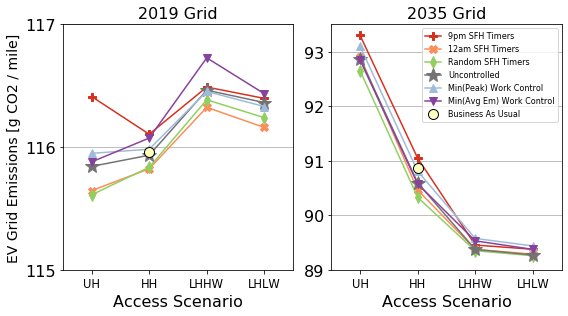

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4.5), sharey=False, sharex=True)
titles = ['UH', 'HH', 'LHHW', 'LHLW'] 

colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Random SFH Timers',  'Uncontrolled', 'Min(Peak) Work Control', 'Min(Avg Em) Work Control']

for i in range(2):
    axes[i].set_xticks(np.arange(0, 4))
    axes[i].set_xticklabels(labels=titles, fontsize=11.5)
    axes[i].set_xlabel('Access Scenario', fontsize=16)

shifts = [-0.2, -0.1, 0, 0.1, 0.2]
ms = [8, 8, 8, 14, 8, 8]
lines = ['-P', '-X', '-d', '-*', '-^','-v']

for control_idx in range(6):
    axes[0].plot(np.arange(0, 4), vals_1[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1)
axes[0].scatter([1], np.array(vals_1[6, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

for control_idx in range(6):
    axes[1].plot(np.arange(0, 4), vals_2[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], ms=ms[control_idx], zorder=1, label=control_labels[control_idx])
axes[1].scatter([1], np.array(vals_2[6, 4]), label='Business As Usual', marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2)

axes[0].set_xlim([-0.5, 3.5])

axes[0].set_yticks([115, 116, 117])
axes[0].set_yticklabels([115, 116, 117], fontsize=16)
axes[1].set_yticks(np.arange(89, 94))
axes[1].set_yticklabels(np.arange(89, 94), fontsize=16)
for i in range(2):
    axes[i].set_axisbelow(True)        
    axes[i].grid(axis='y')
    
axes[0].set_title('2019 Grid', fontsize=16)
axes[1].set_title('2035 Grid', fontsize=16)

axes[1].legend(fontsize=8)

axes[0].set_ylabel('EV Grid Emissions [g CO2 / mile]', fontsize=14)

plt.tight_layout()
plt.savefig('SupplementPlotting/Plots/supfig24_v2.pdf', bbox_inches='tight')
plt.show()